# Mie Theory + Thermoplasmonics Calculator

In [1]:
import math
import numpy as npy
import EMfields as em
import RefractiveIndex as ri
import matplotlib.pyplot as plt
import opticalCrossSection as ocs

### Step 1: Parameter setting (manual)

In [15]:
# Definição dos parâmetros de análise e importação dos parâmetros materiais

## Se a NP for uma nanoesfera, shell_material equivale ao material da esfera
shell_material = 'Au'                                    
core_material = 'Au'
medium_material = 'Water'

## Se True, é nanocasca. Se False, é nanoesfera
isShell = False

## Raio da da nanoesfera ou núcleo (nm)
a = 50

## Espessura da casca (nm)
t = 7

## Raio da nanocasca (nm)
if isShell:
    b = a + t
else:
    b = a

## Início da região de exibição no plot
lambda_min = 400                                         

## Fim da região de exibição no plot
lambda_max = 1100

## Incluir correção de drude?
drude = True

### Step 2: Cross-section calculation (auto)

In [16]:
wl, N, N1, N2, mu1, mu2 = ri.setupRI(shell_material,core_material,medium_material,a,b,lambda_min,lambda_max,isShell,drude)

In [17]:
if isShell:
    Csca, Cext, Cabs, Cbck = ocs.shellCS(wl*(1e9),N1,N2,N,mu1,mu2,a,b)
else:
    Csca, Cext, Cabs, Cbck = ocs.sphereCS(wl*(1e9),N2,N,mu2,a)

In [18]:
wl = npy.delete(wl,len(wl)-1)
Csca = npy.delete(Csca,len(Csca)-1)
Cext = npy.delete(Cext,len(Cext)-1)
Cabs = npy.delete(Cabs,len(Cabs)-1)
Cbck = npy.delete(Cbck,len(Cbck)-1)

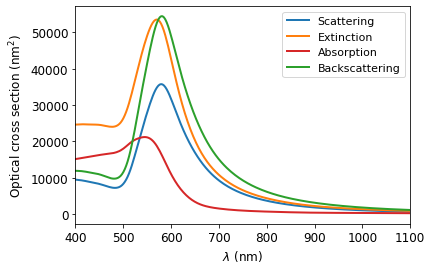

In [19]:
fig1 = plt.figure(1)
ax1 = plt.gca()
lines1 = plt.plot((1e9)*wl,Csca,'tab:blue',(1e9)*wl,Cext,'tab:orange',(1e9)*wl,Cabs,'tab:red',(1e9)*wl,Cbck,'tab:green',linewidth=2)
plt.ylabel('Optical cross section (nm$^{2}$)',fontsize=12)
plt.xlabel('$\lambda$ (nm)',fontsize=12)
plt.legend(lines1[:4], ['Scattering','Extinction','Absorption','Backscattering'],fontsize=11)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax1.set_xlim([lambda_min,lambda_max])
plt.show()

### Step 3: Near-field and Heat power density calculation (auto)

In [20]:
def contorno(radius,size):
    ang = npy.linspace(0,2*math.pi,num=size,endpoint=True)
    contourn = npy.ones([size,size])*radius
    return ang, contourn

In [21]:
wl_anl = 532
r = npy.linspace(a/100,2*b,num=100,endpoint=True)
theta = npy.linspace(0,2*math.pi,num=180,endpoint=True)

In [22]:
# Calculating fields and heat source
E, H, q = em.yzEM(r,theta,shell_material,core_material,medium_material,a,b,wl_anl,isShell,drude)

# Cleaning NaN, +inf and -inf
E = npy.nan_to_num(E, nan=0.0, posinf=0.0, neginf=0.0)
E[:,-1] = E[:,-2]
E[-1,:] = E[-2,:]
H = npy.nan_to_num(H, nan=0.0, posinf=0.0, neginf=0.0)
H[:,-1] = H[:,-2]
H[-1,:] = H[-2,:]
q = npy.nan_to_num(q, nan=0.0, posinf=0.0, neginf=0.0)
q[:,-1] = q[:,-2]
q[-1,:] = q[-2,:]

In [23]:
ang1, contourn1 = contorno(a,72)
ang2, contourn2 = contorno(b,72)

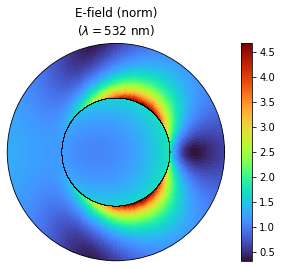

In [24]:
fig2 = plt.figure(2)
ax2 = fig2.add_subplot(111,polar=True)
ax2.set_yticklabels([])
ax2.set_xticklabels([])
ax2.grid(False)
pc2 = ax2.pcolormesh(theta,r,E,cmap='turbo')
ax2.plot(ang1,contourn1,'k-',ang2,contourn2,'k-',linewidth=0.01)
ax2.set_title("E-field (norm)\n$(\\lambda = $"+str(int(wl_anl))+" nm)", va='bottom')
fig2.colorbar(pc2)

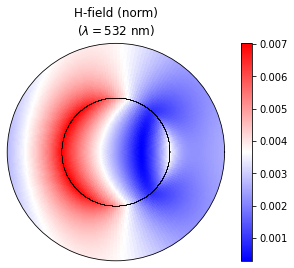

In [25]:
fig3 = plt.figure(3)
ax3 = fig3.add_subplot(111,polar=True)
ax3.set_yticklabels([])
ax3.set_xticklabels([])
ax3.grid(False)
pc3 = ax3.pcolormesh(theta,r,H,cmap='bwr')
ax3.plot(ang1,contourn1,'k-',ang2,contourn2,'k-',linewidth=0.01)
ax3.set_title("H-field (norm)\n$(\\lambda = $"+str(int(wl_anl))+" nm)", va='bottom')
fig3.colorbar(pc3)

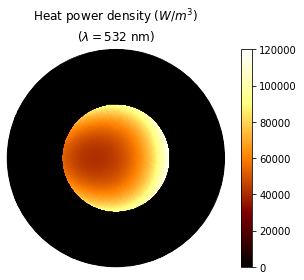

In [26]:
fig4 = plt.figure(4)
ax4 = fig4.add_subplot(111,polar=True)
ax4.set_yticklabels([])
ax4.set_xticklabels([])
ax4.grid(False)
pc4 = ax4.pcolormesh(theta,r,q,cmap='afmhot')
ax4.plot(ang1,contourn1,'k-',ang2,contourn2,'k-',linewidth=0.01)
ax4.set_title("Heat power density $(W/m^{3})$\n$(\\lambda = $"+str(int(wl_anl))+" nm)", va='bottom')
fig4.colorbar(pc4)